## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import tree

In [4]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [5]:
df = df.drop(['Name'], axis= 1)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [7]:
df.isnull().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [8]:
df.shape

(887, 7)

In [9]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [10]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


## Transforming Dataset

## Fare

In [11]:
def ticket(fare):
    if fare < 10:
        return 'low'
    elif fare < 50:
        return 'medium'
    else:
        return 'high'

In [12]:
df['Fare'] = df['Fare'].apply(ticket)

In [13]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,low
1,1,1,female,38.0,1,0,high
2,1,3,female,26.0,0,0,low
3,1,1,female,35.0,1,0,high
4,0,3,male,35.0,0,0,low
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,medium
883,1,1,female,19.0,0,0,medium
884,0,3,female,7.0,1,2,medium
885,1,1,male,26.0,0,0,medium


## Age

In [14]:
def age_years(age):
    if age < 14:
        return 'child'
    elif age < 18:
        return 'teen'
    elif age < 60:
        return 'adult'
    else:
        return 'senior adult'

In [15]:
df['Age'] = df['Age'].apply(age_years)

In [16]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,adult,1,0,low
1,1,1,female,adult,1,0,high
2,1,3,female,adult,0,0,low
3,1,1,female,adult,1,0,high
4,0,3,male,adult,0,0,low
...,...,...,...,...,...,...,...
882,0,2,male,adult,0,0,medium
883,1,1,female,adult,0,0,medium
884,0,3,female,child,1,2,medium
885,1,1,male,adult,0,0,medium


## Replacing String with numbers

In [17]:
df.Sex = df.Sex.replace({'male': 1, 'female': 0})

In [18]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,adult,1,0,low
1,1,1,0,adult,1,0,high
2,1,3,0,adult,0,0,low
3,1,1,0,adult,1,0,high
4,0,3,1,adult,0,0,low
...,...,...,...,...,...,...,...
882,0,2,1,adult,0,0,medium
883,1,1,0,adult,0,0,medium
884,0,3,0,child,1,2,medium
885,1,1,1,adult,0,0,medium


In [19]:
df.Age = df.Age.replace({'child': 0, 'teen': 1, 'adult' : 2, 'senior adult' : 3})

In [20]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,2,1,0,low
1,1,1,0,2,1,0,high
2,1,3,0,2,0,0,low
3,1,1,0,2,1,0,high
4,0,3,1,2,0,0,low
...,...,...,...,...,...,...,...
882,0,2,1,2,0,0,medium
883,1,1,0,2,0,0,medium
884,0,3,0,0,1,2,medium
885,1,1,1,2,0,0,medium


In [21]:
df.Fare = df.Fare.replace({'low': 0, 'medium': 1, 'high' : 2})

In [22]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,2,1,0,0
1,1,1,0,2,1,0,2
2,1,3,0,2,0,0,0
3,1,1,0,2,1,0,2
4,0,3,1,2,0,0,0
...,...,...,...,...,...,...,...
882,0,2,1,2,0,0,1
883,1,1,0,2,0,0,1
884,0,3,0,0,1,2,1
885,1,1,1,2,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Survived                 887 non-null    int64
 1   Pclass                   887 non-null    int64
 2   Sex                      887 non-null    int64
 3   Age                      887 non-null    int64
 4   Siblings/Spouses Aboard  887 non-null    int64
 5   Parents/Children Aboard  887 non-null    int64
 6   Fare                     887 non-null    int64
dtypes: int64(7)
memory usage: 48.6 KB


In [24]:
# dependent 
y = df.Survived
y


0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [25]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [26]:
# independent 
x = df.drop(['Survived'], axis=1)
x

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,2,1,0,0
1,1,0,2,1,0,2
2,3,0,2,0,0,0
3,1,0,2,1,0,2
4,3,1,2,0,0,0
...,...,...,...,...,...,...
882,2,1,2,0,0,1
883,1,0,2,0,0,1
884,3,0,0,1,2,1
885,1,1,2,0,0,1


In [27]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(709, 6)
(178, 6)
(709,)
(178,)


## Logistic Regression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(x_train, y_train)

LogisticRegression()

In [31]:
model.score(x_train , y_train)

0.7912552891396333

In [32]:
model.score(x_test, y_test)

0.7865168539325843

In [33]:
y_predict = model.predict(x_test)

In [34]:
y_predict

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [35]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
723,1,1
607,0,0
243,0,0
250,0,1
622,0,0
...,...,...
606,1,1
629,1,0
152,0,0
211,0,0


## Decision Tree

In [36]:
model2 = DecisionTreeClassifier()

In [37]:
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
model2.score(x_train , y_train)

0.8589562764456982

In [39]:
model2.score(x_test, y_test)

0.7865168539325843

In [40]:
y_predict = model.predict(x_test)

In [41]:
y_predict

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [42]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
723,1,1
607,0,0
243,0,0
250,0,1
622,0,0
...,...,...
606,1,1
629,1,0
152,0,0
211,0,0


## Confusion Matrix

In [43]:
performance = confusion_matrix(y_test, y_predict)

In [44]:
performance

array([[84, 17],
       [21, 56]], dtype=int64)

In [45]:
p = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
p

Predicted,0,1
Actual,,
0,84,17
1,21,56


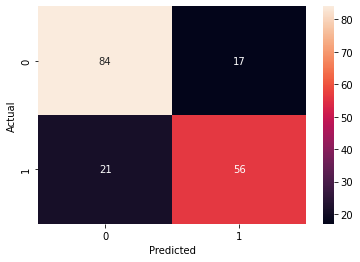

In [46]:
sns.heatmap(p, annot = True)
plt.show()

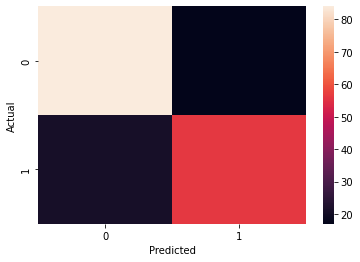

In [47]:
sns.heatmap(p)
plt.show()

In [48]:
f = ['Pclass',	'Sex',	'Age'	,'Siblings/Spouses Aboard'	,'Parents/Children Aboard',	'Fare']
f

['Pclass',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [49]:
c = ['0' , '1']
c

['0', '1']

[Text(0.5409564393939394, 0.9615384615384616, 'Sex <= 0.5\ngini = 0.468\nsamples = 709\nvalue = [444, 265]\nclass = 0'),
 Text(0.3072916666666667, 0.8846153846153846, 'Pclass <= 2.5\ngini = 0.383\nsamples = 240\nvalue = [62, 178]\nclass = 1'),
 Text(0.12878787878787878, 0.8076923076923077, 'Fare <= 1.5\ngini = 0.077\nsamples = 124\nvalue = [5, 119]\nclass = 1'),
 Text(0.11363636363636363, 0.7307692307692307, 'Parents/Children Aboard <= 1.5\ngini = 0.14\nsamples = 66\nvalue = [5, 61]\nclass = 1'),
 Text(0.09848484848484848, 0.6538461538461539, 'Siblings/Spouses Aboard <= 0.5\ngini = 0.171\nsamples = 53\nvalue = [5, 48]\nclass = 1'),
 Text(0.06060606060606061, 0.5769230769230769, 'Pclass <= 1.5\ngini = 0.111\nsamples = 34\nvalue = [2, 32]\nclass = 1'),
 Text(0.030303030303030304, 0.5, 'Age <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = 1'),
 Text(0.015151515151515152, 0.4230769230769231, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.045454545454545456, 0.4230

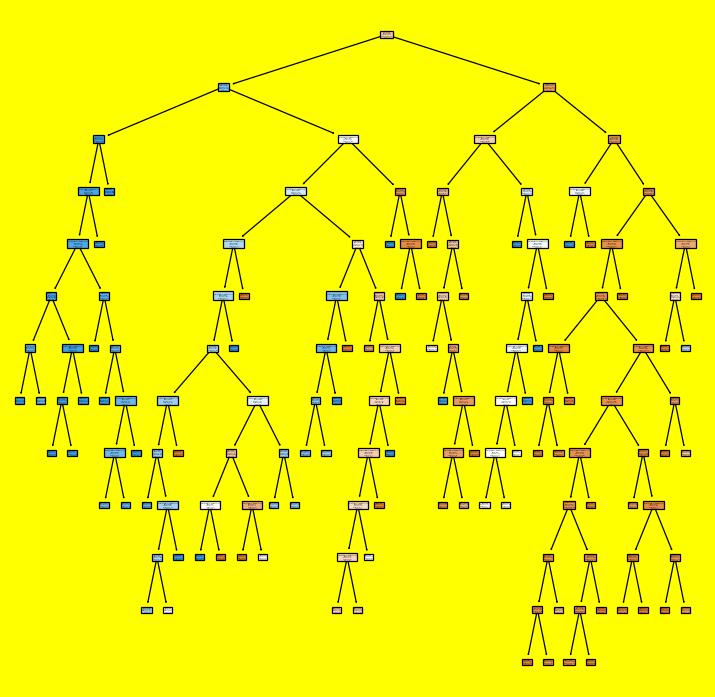

In [50]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi = 90, facecolor = 'yellow')
tree.plot_tree(model2, feature_names = f, class_names = c, filled = True)

In [51]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

In [61]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)

In [62]:
model3 = RandomForestClassifier()
model3.fit(x,y)

RandomForestClassifier()

In [63]:
y_predict = model.predict(x_test)

In [64]:
accuracy_score(y_test, y_predict)

0.7471910112359551

In [65]:
x

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,2,1,0,0
1,1,0,2,1,0,2
2,3,0,2,0,0,0
3,1,0,2,1,0,2
4,3,1,2,0,0,0
...,...,...,...,...,...,...
882,2,1,2,0,0,1
883,1,0,2,0,0,1
884,3,0,0,1,2,1
885,1,1,2,0,0,1


In [66]:
y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [67]:
model4 = RandomForestClassifier(n_estimators=100)
model4.fit(x,y)

RandomForestClassifier()

In [58]:
y_predict = model.predict(x_test)

In [68]:
accuracy_score(y_test, y_predict)

0.7471910112359551

In [60]:
confusion_matrix(y_test, y_predict)

array([[84, 17],
       [21, 56]], dtype=int64)